# 데이터 전처리 (Data Processing) 

- 데이터 분석에 적합하게 데이터를 가공하는 작업  




### 데이터 전처리 종류 

- 데이터 클리닝 - 결측치 처리, 잘못된 값 처리
- 스케일링 - 변수들의 값의 범위를 동일하게 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

## 데이터 클리닝

###  결측치 및 잘못된 값 처리
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시 : not a number)
- 결측치 처리 방법 세 가지
  - 삭제 :결측치가 포함된 샘플(행) 삭제 : dropna()  
  - 대체 : 결측치를 적절한 값으로 대체 : fillna()  
  - 그대로 둠 : 다음 분석 단계로 넘겨서 처리 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns

## 실습 데이터
- 정규분포를 따르는 키와 몸무게 데이터 생성
- 평균 170cm, 65kg, 표준편차 4cm, 5kg

In [4]:
n_samples = 1000
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw.head()

,height,weight
0,170.24,65.65
1,177.96,68.75
2,166.76,64.75
3,169.76,71.55
4,171.24,67.45


<Axes: ylabel='Count'>

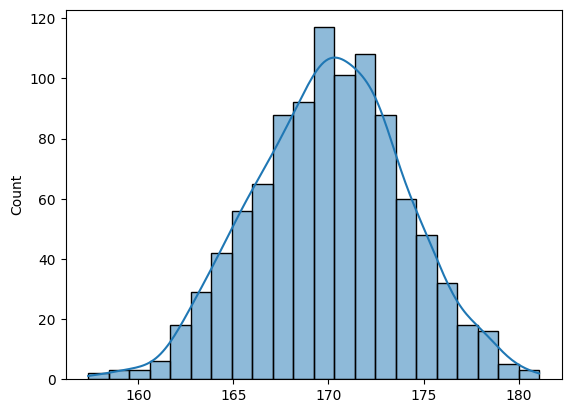

In [5]:
df = df_raw.copy()
sns.histplot(df.height.values, kde=True)

In [6]:
df.weight[2] = np.nan
df.head()

,height,weight
0,170.24,65.65
1,177.96,68.75
2,166.76,NaN
3,169.76,71.55
4,171.24,67.45


## 결측치 처리 

- 결측치 확인은 np.isnull() 사용
- 결측치 치환은 np.fillna() 사용

In [7]:
df.isnull().sum()

height    0
weight    1
dtype: int64

In [8]:
df2 = df.dropna() # 결측치를 가진 행 삭제
df2

,height,weight
0,170.24,65.65
1,177.96,68.75
3,169.76,71.55
4,171.24,67.45
5,168.28,63.75
...,...,...
995,167.76,66.30
996,167.08,70.10
997,174.52,66.40
998,172.68,58.40


In [9]:
df3 = df.fillna(method='ffill') # ffill(forward fill) : 이전 값으로 대체
df3
df4 = df.fillna(method='bfill') # bfill(backward fill) : 다음 값으로 대체
df4

,height,weight
0,170.24,65.65
1,177.96,68.75
2,166.76,68.75
3,169.76,71.55
4,171.24,67.45
...,...,...
995,167.76,66.30
996,167.08,70.10
997,174.52,66.40
998,172.68,58.40


,height,weight
0,170.24,65.65
1,177.96,68.75
2,166.76,71.55
3,169.76,71.55
4,171.24,67.45
...,...,...
995,167.76,66.30
996,167.08,70.10
997,174.52,66.40
998,172.68,58.40


<Axes: xlabel='height', ylabel='Density'>

<Axes: xlabel='height', ylabel='Density'>

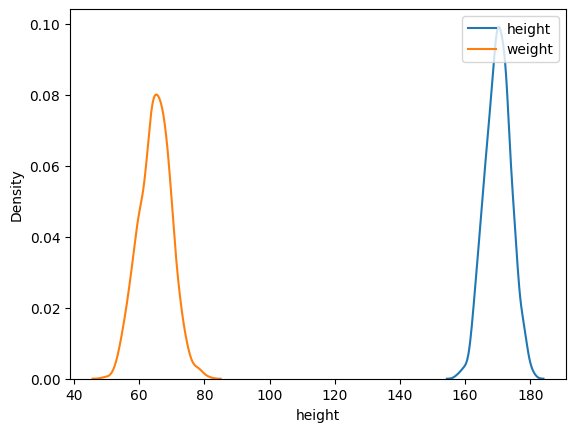

In [10]:
sns.kdeplot(data=df, x='height', label='height')
sns.kdeplot(data=df, x='weight', label='weight')
plt.legend(ncol=1, loc='upper right')
plt.show()

#### 주택가격 데이터에서 결측치 처리 

In [11]:
data = pd.read_csv("data/house_price.csv")
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## 스케일링 
- 데이터의 값의 범위를 조정하는것  
- 표준 스케일링 : 표준화
  - 각 칼럼의 평균을 0, 분산이 1이 되도록 스케일링 
  - 데이터의  분포 형태는 그대로 유지하면서 평균을 0, 표준편차를 1로 환산하는 것일 뿐  
- Min-max 스케일링
  - 데이터가 0과 1 사이에 위치하도록 스케일링 
  - 최소값 0, 최대값 1이 됨
  - 데이터의 최소값과 최대값을 알고 있을 때 사용  

In [12]:
# 표준 스케일링
from sklearn.preprocessing import StandardScaler

# 표준 분포화(평균 : 0, 표준편차 : 1)을 해주는 메소드
df = df_raw.copy()
scale = StandardScaler()
df[['height_StSc', 'weight_StSc']] = scale.fit_transform(df[['height', 'weight']])
df.head()

,height,weight,height_StSc,weight_StSc
0,170.24,65.65,0.051379,0.157707
1,177.96,68.75,2.017297,0.789920
2,166.76,64.75,-0.834812,-0.025839
3,169.76,71.55,-0.070855,1.360951
4,171.24,67.45,0.306031,0.524798


<Axes: xlabel='height_StSc', ylabel='Density'>

<Axes: xlabel='height_StSc', ylabel='Density'>

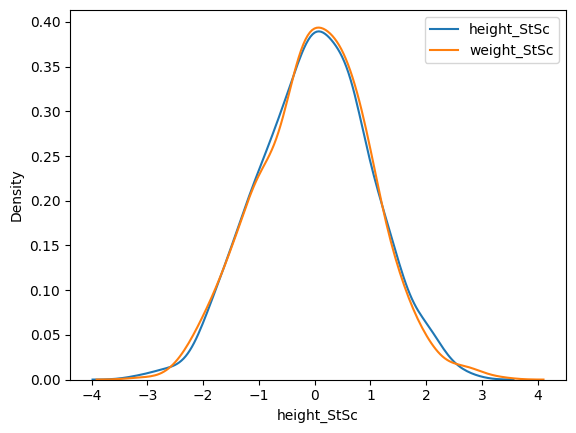

In [13]:
sns.kdeplot(data=df, x='height_StSc', label='height_StSc')
sns.kdeplot(data=df, x='weight_StSc', label='weight_StSc')
plt.legend(ncol=1, loc='upper right')
plt.show()

### 스케일링 이전의 원래 값으로 환원하는 방법
- inverse_transform을 사용한다

In [14]:
scale.inverse_transform(df[['height_StSc', 'weight_StSc']])[:5]

array([[170.24,  65.65],
       [177.96,  68.75],
       [166.76,  64.75],
       [169.76,  71.55],
       [171.24,  67.45]])

### 데이터 분포 확인

## Min-Max 스케일링
- 데이터의 최소값이 0, 최대값이 1이 되도록 조정

In [15]:
# Min-Max 스케일링
from sklearn.preprocessing import MinMaxScaler

# 최대, 최소를 각각 1, 0으로 맞추어 주는 메소드
min_max_scale = MinMaxScaler()
df[['height_MMS', 'weight_MMS']] = min_max_scale.fit_transform(df[['height', 'weight']])
df.head()

,height,weight,height_StSc,weight_StSc,height_MMS,weight_MMS
0,170.24,65.65,0.051379,0.157707,0.543002,0.509404
1,177.96,68.75,2.017297,0.789920,0.868465,0.606583
2,166.76,64.75,-0.834812,-0.025839,0.396290,0.481191
3,169.76,71.55,-0.070855,1.360951,0.522766,0.694357
4,171.24,67.45,0.306031,0.524798,0.585160,0.565831


<Axes: xlabel='height_MMS', ylabel='Density'>

<Axes: xlabel='height_MMS', ylabel='Density'>

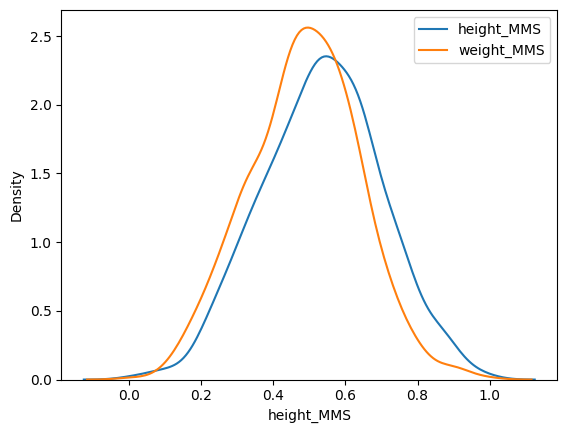

In [16]:
sns.kdeplot(data=df, x='height_MMS', label='height_MMS')
sns.kdeplot(data=df, x='weight_MMS', label='weight_MMS')
plt.legend(ncol=1, loc='upper right')
plt.show()

### 이상치 처리  
- 이상치 확인 목적
  1. 이상치를 제거하여 데이터 분석의 정확도를 높이는 것
  2. 이상치를 찾는 것  (outlier detection)
     - 신용카드 사용 데이터 분석 시 특이한 구매를 찾는 경우
     - 주문 내역 데이터 분석 시 구매 금액이 월등히 높은 경우  
     - 기기 등 작동 데이터 분석 시 이상을 찾는 경우 

In [17]:
# 이상치를 포함한 생성
df['height_2'] = df['height']
df['height_2'][0] = 220

<Axes: xlabel='height_MMS', ylabel='Density'>

<Axes: xlabel='height_MMS', ylabel='Density'>

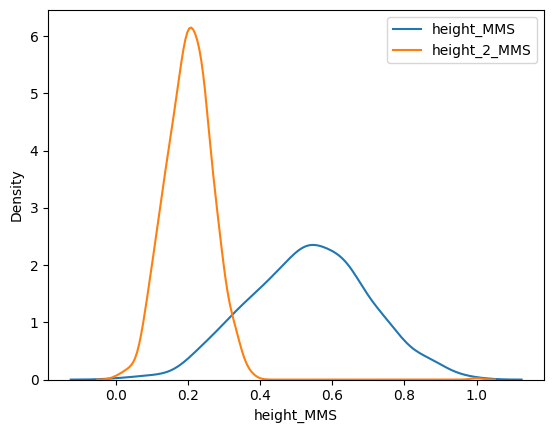

In [18]:
df['height_2_StSc'] = scale.fit_transform(df[['height_2']])
df['height_2_MMS'] = min_max_scale.fit_transform(df[['height_2']])

# 표준 스케일링은 크게 차이가 없지만 min-max 스케일링에서는 큰 차이를 보이게 된다
sns.kdeplot(data=df, x='height_MMS', label='height_MMS')
sns.kdeplot(data=df, x='height_2_MMS', label='height_2_MMS')
plt.legend(ncol=1, loc='upper right')
plt.show()

<Axes: >

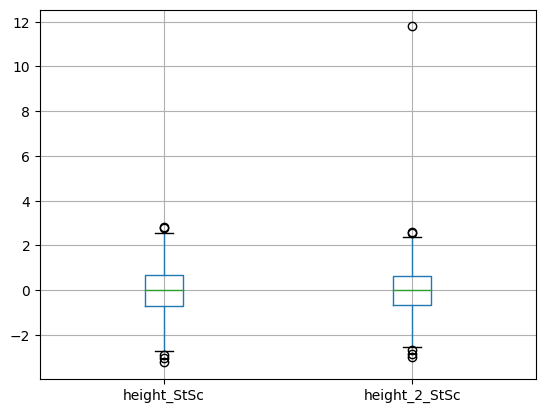

In [19]:
df[['height_StSc', 'height_2_StSc']].boxplot()

#### 주택 가격 데이터에서 이상치 처리

In [20]:
# 주택 가격 데이터에서 이상치 처리
# 주택가격 데이터 
# data = pd.read_csv("data/house_price.csv")
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


<Axes: xlabel='SalePrice', ylabel='Density'>

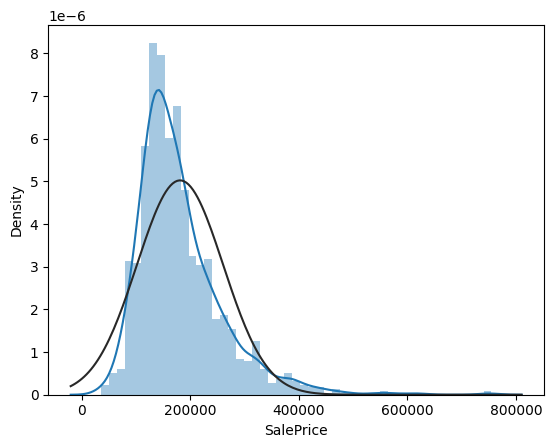

755000


In [21]:
# distplot()으로 이상치 확인
house_df = data.copy()
from scipy import stats
sns.distplot(house_df['SalePrice'], fit=stats.norm)
plt.show()
print(house_df['SalePrice'].max())

In [22]:
house_df['SalePrice_StSc'] = scale.fit_transform(house_df[['SalePrice']])
house_df['SalePrice_StSc']

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice_StSc, Length: 1460, dtype: float64

In [23]:
house_df['SalePrice_StSc'].sort_values(ascending=False).head(10)
house_df['SalePrice_StSc'].sort_values(ascending=False).tail(10)

691     7.228819
1182    7.102899
1169    5.591855
898     5.423840
803     5.062146
1046    4.730321
440     4.710413
769     4.496348
178     4.040982
798     3.828970
Name: SalePrice_StSc, dtype: float64

812    -1.573100
1325   -1.585604
705    -1.585604
1337   -1.617084
710    -1.623380
30     -1.774484
533    -1.783299
968    -1.800928
916    -1.833528
495    -1.838704
Name: SalePrice_StSc, dtype: float64

<Axes: >

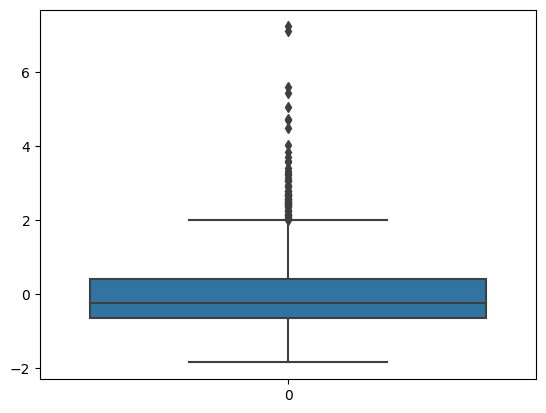

In [24]:
sns.boxplot(house_df['SalePrice_StSc'])


### 로그 변환 및 환원
- 정규 분포가 아닌 결과값을 정규 분포 형태로 변환  
- 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법이 로그 변환    
- log1p( ) 이용해 로그 변환한 결과값을 기반으로 학습한 후  
- 예측 시 다시 결과값을 expm1( )으로 환원해서 사용  
  

#### 로그 변환을 하는 이유
- 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함
- 큰 수를 작게 만들고, 복잡한 계산을 쉽게 만들고, 
- 데이터의 왜곡도를 줄여서 데이터 분석 시 의미있는 결과를 도출하기 위함

### log1p(x) : log(x+1)    
- log(진수)
    - 진수는 양수만 가능  
    - 0에 가까운 아주 작은 양수의 경우(0.0000000..) -inf가 나옴  
    - 이런 문제를 방지하기 위해 1을 더해서 0보다 큰 양수의 값을 취함  
    - Numpy에서는 log1p()로 지원  

<Axes: xlabel='SalePrice_log', ylabel='Density'>

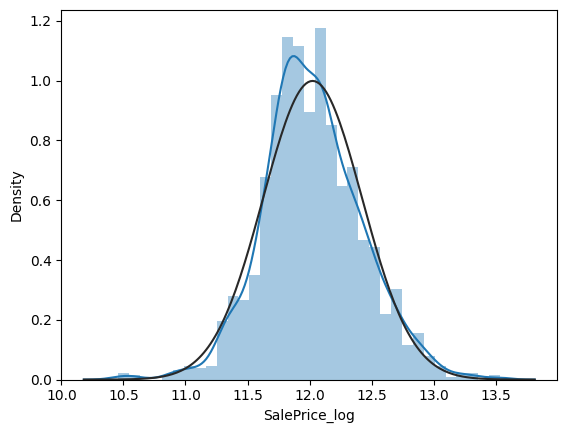

In [25]:
house_df['SalePrice_log'] = np.log1p(house_df['SalePrice'])
sns.distplot(house_df['SalePrice_log'], fit=stats.norm)
plt.show()

<Axes: xlabel='SalePrice_log_StSc', ylabel='Density'>

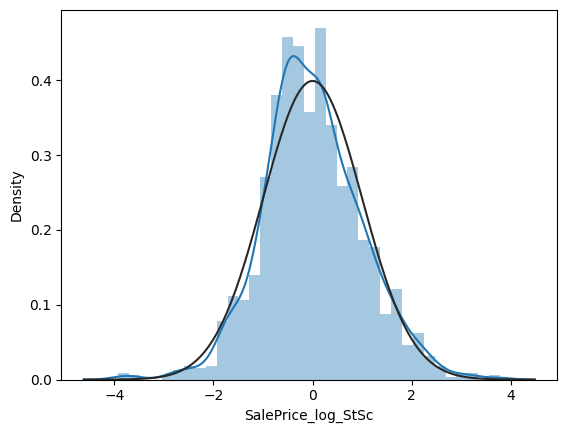

In [26]:
house_df['SalePrice_log_StSc'] = scale.fit_transform(house_df[['SalePrice_log']])
sns.distplot(house_df['SalePrice_log_StSc'], fit=stats.norm)
plt.show()

<Axes: >

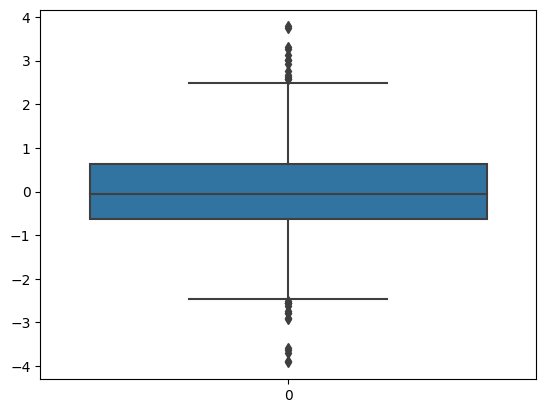

In [27]:
# 로그변환하지 않은 스케일링 값(SalePrice_StSc)보다 상위, 하위값이 균일하게 분포되도록 바뀌었다(편차가 줄어듦)
sns.boxplot(house_df['SalePrice_log_StSc'])
plt.show()

## scatter( )로 이상치 제거

In [28]:
house_df2 = data.copy()

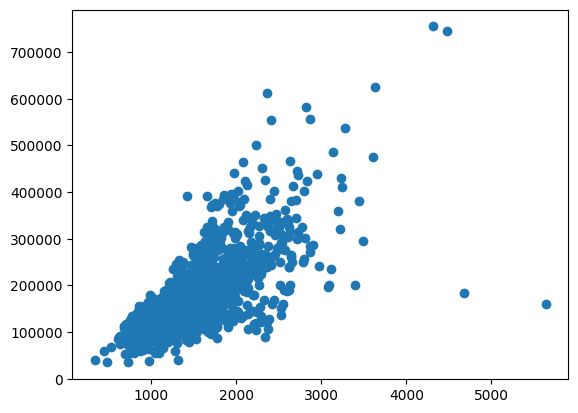

In [29]:
plt.scatter(x='GrLivArea', y='SalePrice', data=house_df2)
plt.show()

In [30]:
house_df2[['GrLivArea', 'SalePrice']].sort_values(by='GrLivArea', ascending=False).head(4)
# 이상치 인덱스가 1298, 523인 것을 알 수 있다

,GrLivArea,SalePrice
1298,5642,160000
523,4676,184750
1182,4476,745000
691,4316,755000


(1460, 81)

(1458, 81)

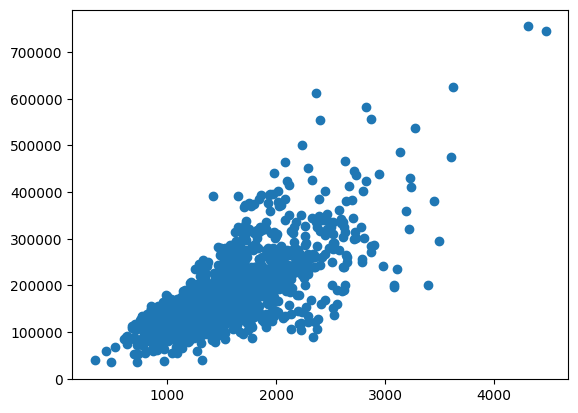

In [31]:
# 해당 인덱스 삭제
house_df2.shape
house_df2.drop([1298, 523], inplace=True)
house_df2.shape
plt.scatter(x='GrLivArea', y='SalePrice', data=house_df2)
plt.show()

## 본격적인 log1p( ) 사용

In [32]:
n1 = np.log(10)
n1

2.302585092994046

In [33]:
np.exp(n1)

10.000000000000002

In [34]:
n2 = np.log1p(10)
n2

2.3978952727983707

In [35]:
# expm1(x) : exp(x)-1
np.expm1(n2)

10.000000000000002

### 카테고리 값의 인코딩 

### 카테고리 값의 문자열 변환
- 머신러닝/딥러닝 알고리즘에서 문자열 값을 입력 값으로 허용하지 않음
- 인코딩 처리하여 숫자형으로 변환


### 머신러닝의 대표적인 인코딩 방식
- 레이블 인코딩 (Label Encoding)
- 원-핫 인코딩 (One-Hot-Encoding)


### 레이블 인코딩 (Label Encoding)
- items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']  
- encoder = LabelEncoder()  
- encoder.fit(items)  
- labels = encoder.transform(items)  
- 인코딩 변환값 :  [0 1 4 5 3 3 2 2]  

--- 
레이블 인코딩 방식 주의
- 간단하게 문자열 값을 숫자형 값으로 변환하지만  
- 이는 단순 코드일 뿐 크기와는 상관 없음  
- 일부 ML 알고리즘에서 이를 적용할 경우 예측 성능이 떨어지는 경우 발생  
- 숫자 값의 크기 특성이 작용하기 때문  
- 즉, 냉장고가 1 믹서가 2로 변환되면 1보다 2가 더 큰 값이므로 가중치가 부여되거나  
- 더 중요하게 인식될 가능성 발생  
- 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에서는 적용하지 않음  
- 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩 적용 시 문제 없음  

### 원-핫 인코딩 변환  
- 행 형태의 피처 값을 열 형태로 변화한 뒤    
- 피처 값 인덱스에 해당하는 칼럼에는 1로 표시하고   
- 나머지 칼럼에는 0으로 표시하는 방식    

원-핫 인코딩 변환 방식   
- 방법1 : 사이킷런의 원-핫 인코딩 : OneHotEncoder 클래스로 쉽게 변환  
    - LabelEncode()로 숫자 변환 후 OneHotEncoder() 수행 
- 방법2 : 판다스의 get_dummies()를 이용해서 원-핫 인코딩 수행 
    - pd.get_dummies()는 자동으로 object형만 원-핫 인코딩 수행  


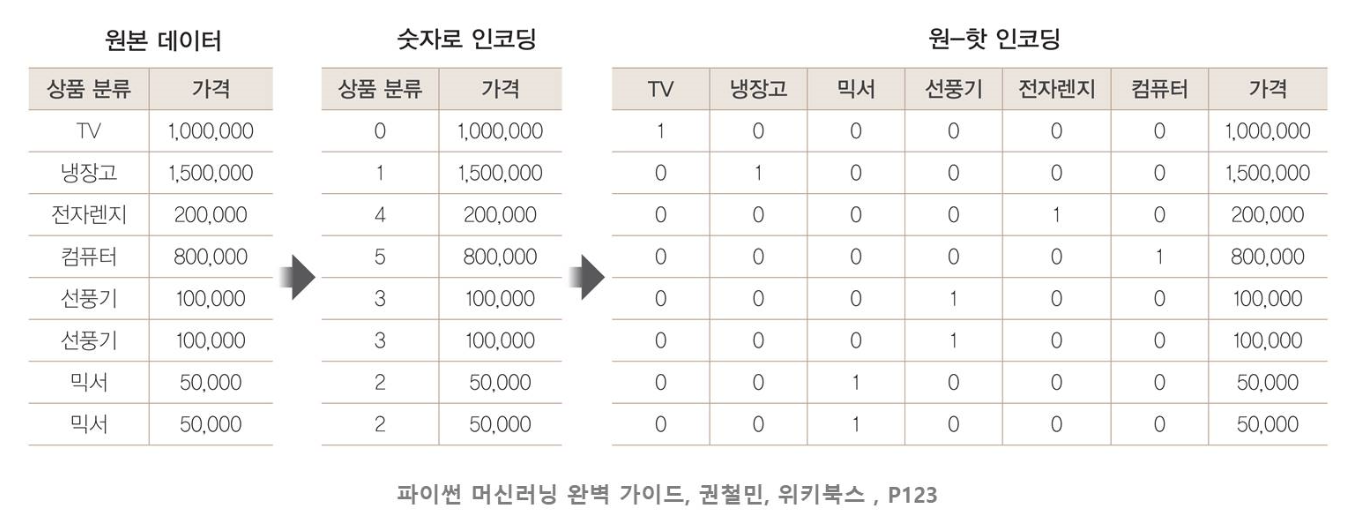

In [36]:
# 방법1 : 사이킷런의 원-핫 인코딩 : OneHotEncoder 클래스로 쉽게 변환  

# 원-핫 인코딩 전체 과정
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

LabelEncoder()

array([0, 1, 4, 5, 3, 3, 2, 2])

In [37]:
# 형태 변환
labels = labels.reshape(-1, 1) # 행 수치는 자동으로 설정하고 열은 한 개로 설정
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [38]:
OH_encoder = OneHotEncoder()
OH_encoder.fit(labels)
OH_labels = OH_encoder.transform(labels)
OH_labels
print('--인코더 데이터--\n', OH_labels.toarray())

OneHotEncoder()

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

--인코더 데이터--
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [39]:
# 방법2 : 판다스의 get_dummies()를 이용해서 원-핫 인코딩 수행  

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [40]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [41]:
pd.get_dummies(df, dtype=int) # 매애우 간단하다!

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [42]:
# house_df에 해보자
print('One_Hot 이전 데이터\n', house_df.shape)
house_df_OH = pd.get_dummies(house_df)
print('One_Hot 이후 데이터\n', house_df_OH.shape)

One_Hot 이전 데이터
 (1460, 84)
One_Hot 이후 데이터
 (1460, 292)


In [43]:
house_df_OH.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=292)

In [44]:
df_raw

,height,weight
0,170.24,65.65
1,177.96,68.75
2,166.76,64.75
3,169.76,71.55
4,171.24,67.45
...,...,...
995,167.76,66.30
996,167.08,70.10
997,174.52,66.40
998,172.68,58.40


In [45]:
df_raw['tall'] = pd.cut(x=df_raw['height'], bins=[0, 160, 174, np.inf], labels=['small', 'standard', 'tall'])
df_raw

,height,weight,tall
0,170.24,65.65,standard
1,177.96,68.75,tall
2,166.76,64.75,standard
3,169.76,71.55,standard
4,171.24,67.45,standard
...,...,...,...
995,167.76,66.30,standard
996,167.08,70.10,standard
997,174.52,66.40,tall
998,172.68,58.40,standard


In [46]:
df_raw.value_counts('tall')

tall
standard    835
tall        157
small         8
Name: count, dtype: int64

In [47]:
OH_data = pd.get_dummies(df_raw['tall'], dtype=int)
pd.concat([df_raw, OH_data], axis=1)

,height,weight,tall,small,standard,tall
0,170.24,65.65,standard,0,1,0
1,177.96,68.75,tall,0,0,1
2,166.76,64.75,standard,0,1,0
3,169.76,71.55,standard,0,1,0
4,171.24,67.45,standard,0,1,0
...,...,...,...,...,...,...
995,167.76,66.30,standard,0,1,0
996,167.08,70.10,standard,0,1,0
997,174.52,66.40,tall,0,0,1
998,172.68,58.40,standard,0,1,0
